# Introduction

In [1]:
"""
What? Regression with confidence interval

Reference: http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/regression_confidence_interval.html
"""

'\nWhat? Regression with confidence interval\n\nRevision No: 1\nLast revised: 03/05/21\nReference: http://www.xavierdupre.fr/app/mlinsights/helpsphinx/notebooks/regression_confidence_interval.html\nGLM\n'

# Import modules

In [2]:
%matplotlib inline
from numpy.random import randn, binomial, rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlinsights.mlmodel import IntervalRegressor
from sklearn.linear_model import LinearRegression
import numpy
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import pandas
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, DotProduct, WhiteKernel
from mlinsights.mlmodel import QuantileLinearRegression
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 10

# Dataset

In [3]:
"""
The data follows the formula: y = \frac{X}{2} + 2 + \epsilon_1 + \eta \epsilon_2. Noises follows the laws 
\epsilon_1 \sim \mathcal{N}(0, 0.2), \epsilon_2 \sim \mathcal{N}(1, 1), \eta \sim \mathcal{B}(2, 0.0.5).
The second part of the noise adds some bigger noise but not always.
"""

'\nThe data follows the formula: y = \x0crac{X}{2} + 2 + \\epsilon_1 + \\eta \\epsilon_2. Noises follows the laws \n\\epsilon_1 \\sim \\mathcal{N}(0, 0.2), \\epsilon_2 \\sim \\mathcal{N}(1, 1), \\eta \\sim \\mathcal{B}(2, 0.0.5).\nThe second part of the noise adds some bigger noise but not always.\n'

In [4]:
N = 200
X = rand(N, 1) * 2
eps = randn(N, 1) * 0.2
eps2 = randn(N, 1) + 1
bin = binomial(2, 0.05, size=(N, 1))
y = (0.5 * X + eps + 2 + eps2 * bin).ravel()

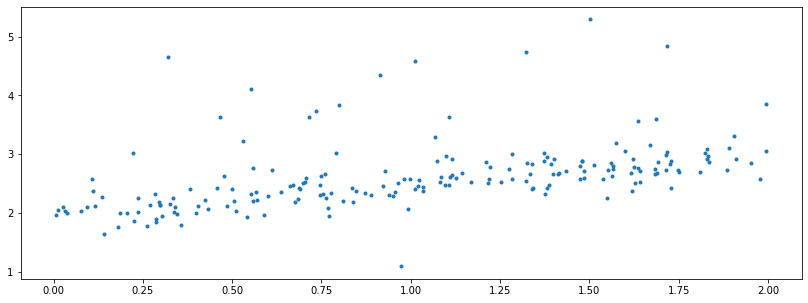

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, '.')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Confidence interval with a linear regression

In [7]:
"""
The object fits many times the same learner, every training is done on a resampling of the training dataset.
http://www.xavierdupre.fr/app/mlinsights/helpsphinx/mlinsights/mlmodel/interval_regressor.html?highlight=intervalregressor#mlinsights.mlmodel.interval_regressor.IntervalRegressor.__init__
"""

'\nThe object fits many times the same learner, every training is done on a resampling of the training dataset.\nhttp://www.xavierdupre.fr/app/mlinsights/helpsphinx/mlinsights/mlmodel/interval_regressor.html?highlight=intervalregressor#mlinsights.mlmodel.interval_regressor.IntervalRegressor.__init__\n'

In [8]:
lin = IntervalRegressor(LinearRegression())
lin.fit(X_train, y_train)

IntervalRegressor(estimator=LinearRegression())

In [9]:
dir(lin)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'alpha',
 'estimator',
 'estimators_',
 'fit',
 'get_params',
 'n_estimators',
 'n_estimators_',
 'n_jobs',
 'predict',
 'predict_all',
 'predict_sorted',
 'score',
 'set_params',
 'verbose']

In [10]:
sorted_X = numpy.array(list(sorted(X_test)))
pred = lin.predict(sorted_X)
bootstrapped_pred = lin.predict_sorted(sorted_X)
min_pred = bootstrapped_pred[:, 0]
max_pred = bootstrapped_pred[:, bootstrapped_pred.shape[1]-1]

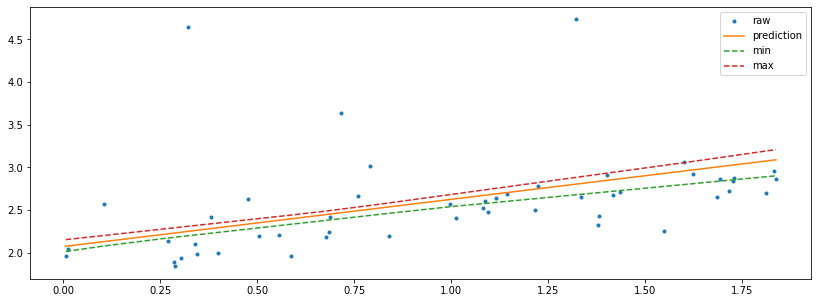

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test, y_test, '.', label="raw")
ax.plot(sorted_X, pred, label="prediction")
ax.plot(sorted_X, min_pred, '--', label="min")
ax.plot(sorted_X, max_pred, '--', label="max")
ax.legend();

# Higher confidence interval

In [12]:
"""
It is possible to use smaller resample of the training dataset or we can increase the number of resamplings.
"""

'\nIt is possible to use smaller resample of the training dataset or we can increase the number of resamplings.\n'

In [13]:
lin2 = IntervalRegressor(LinearRegression(), alpha=0.3)
lin2.fit(X_train, y_train)

IntervalRegressor(alpha=0.3, estimator=LinearRegression())

In [14]:
lin3 = IntervalRegressor(LinearRegression(), n_estimators=50)
lin3.fit(X_train, y_train)

IntervalRegressor(estimator=LinearRegression(), n_estimators=50)

In [15]:
pred2 = lin2.predict(sorted_X)
bootstrapped_pred2 = lin2.predict_sorted(sorted_X)
min_pred2 = bootstrapped_pred2[:, 0]
max_pred2 = bootstrapped_pred2[:, bootstrapped_pred2.shape[1]-1]

In [16]:
pred3 = lin3.predict(sorted_X)
bootstrapped_pred3 = lin3.predict_sorted(sorted_X)
min_pred3 = bootstrapped_pred3[:, 0]
max_pred3 = bootstrapped_pred3[:, bootstrapped_pred3.shape[1]-1]

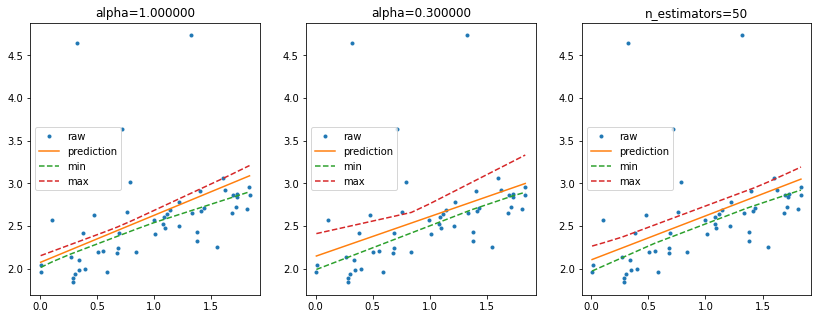

In [17]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(X_test, y_test, '.', label="raw")
ax[0].plot(sorted_X, pred, label="prediction")
ax[0].plot(sorted_X, min_pred, '--', label="min")
ax[0].plot(sorted_X, max_pred, '--', label="max")
ax[0].legend()
ax[0].set_title("alpha=%f" % lin.alpha)
ax[1].plot(X_test, y_test, '.', label="raw")
ax[1].plot(sorted_X, pred2, label="prediction")
ax[1].plot(sorted_X, min_pred2, '--', label="min")
ax[1].plot(sorted_X, max_pred2, '--', label="max")
ax[1].set_title("alpha=%f" % lin2.alpha)
ax[1].legend()
ax[2].plot(X_test, y_test, '.', label="raw")
ax[2].plot(sorted_X, pred3, label="prediction")
ax[2].plot(sorted_X, min_pred3, '--', label="min")
ax[2].plot(sorted_X, max_pred3, '--', label="max")
ax[2].set_title("n_estimators=%d" % lin3.n_estimators)
ax[2].legend()

# With decision trees

In [18]:
tree = IntervalRegressor(DecisionTreeRegressor(min_samples_leaf=10))
tree.fit(X_train, y_train)

IntervalRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=10))

In [19]:
pred_tree = tree.predict(sorted_X)
b_pred_tree = tree.predict_sorted(sorted_X)
min_pred_tree = b_pred_tree[:, 0]
max_pred_tree = b_pred_tree[:, b_pred_tree.shape[1]-1]

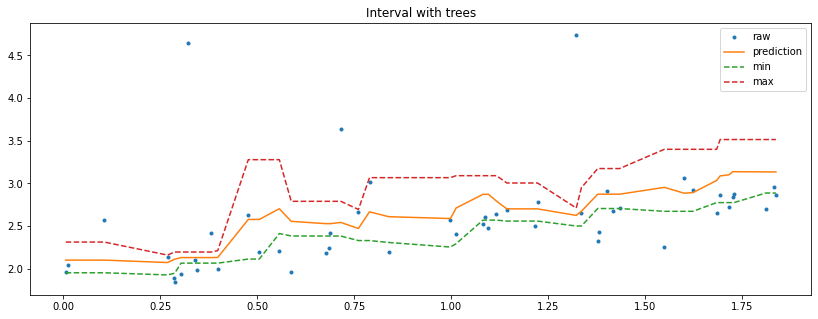

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test, y_test, '.', label="raw")
ax.plot(sorted_X, pred_tree, label="prediction")
ax.plot(sorted_X, min_pred_tree, '--', label="min")
ax.plot(sorted_X, max_pred_tree, '--', label="max")
ax.set_title("Interval with trees")
ax.legend();

In [21]:
"""
In that case, the prediction is very similar to the one a random forest would produce as it is an average of the 
predictions made by 10 trees.
"""

'\nIn that case, the prediction is very similar to the one a random forest would produce as it is an average of the \npredictions made by 10 trees.\n'

# Regression quantile

In [ ]:
m = QuantileLinearRegression()
q1 = QuantileLinearRegression(quantile=0.05)
q2 = QuantileLinearRegression(quantile=0.95)
for model in [m, q1, q2]:
    model.fit(X_train, y_train)

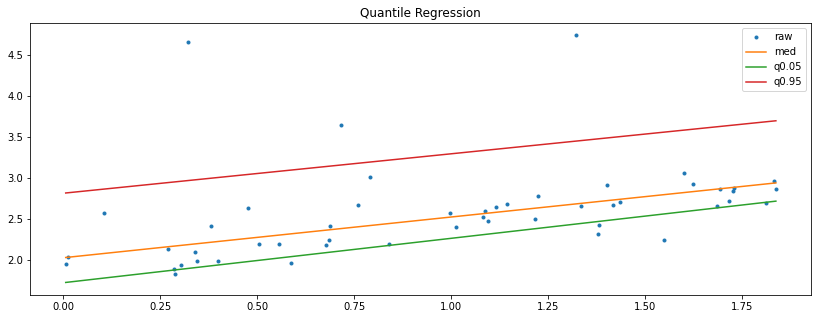

In [23]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test, y_test, '.', label="raw")

for label, model in [('med', m), ('q0.05', q1), ('q0.95', q2)]:
    p = model.predict(sorted_X)
    ax.plot(sorted_X, p, label=label)
ax.set_title("Quantile Regression")
ax.legend();

# With seaborn

In [ ]:
df_train = pandas.DataFrame(dict(X=X_train.ravel(), y=y_train))
g = sns.jointplot("X", "y", data=df_train, kind="reg", color="m", height=7)
g.ax_joint.plot(X_test, y_test, 'ro');

# GaussianProcessRegressor

In [25]:
"""
Last option with this example Gaussian Processes regression: basic introductory example which computes the 
standard deviation for every prediction. It can then be used to show an interval confidence.
"""

'\nLast option with this example Gaussian Processes regression: basic introductory example which computes the \nstandard deviation for every prediction. It can then be used to show an interval confidence.\n'

In [26]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

In [27]:
y_pred, sigma = gp.predict(sorted_X, return_std=True)

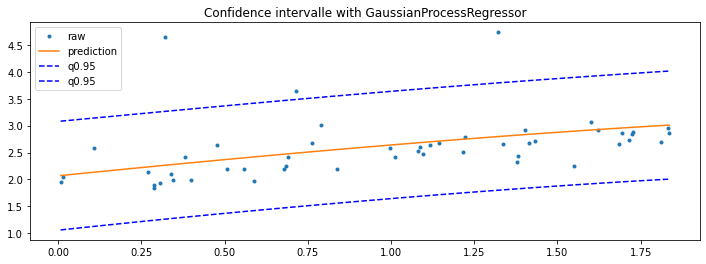

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(X_test, y_test, '.', label="raw")
ax.plot(sorted_X, y_pred, label="prediction")
ax.plot(sorted_X, y_pred + sigma * 1.96, 'b--', label="q0.95")
ax.plot(sorted_X, y_pred - sigma * 1.96, 'b--', label="q0.95")
ax.set_title("Confidence intervalle with GaussianProcessRegressor")
ax.legend();